In [2]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-10/05-22-25/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [5]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. cyan: 0.1801
	2. green: 0.1709
	3. azure: 0.1434
	4. lime: 0.1422
	5. outline: 0.0891
	6. with: 0.0680
	7. have: 0.0250
	8. locate: 0.0112
	9. the: 0.0093
	10. right: 0.0090
	11. corner: 0.0073
	12. shape: 0.0065
	13. unrotate: 0.0054
	14. no: 0.0041
	15. quadratic: 0.0040
	16. up: 0.0038
	17. four: 0.0035
	18. turn: 0.0005
	19. blue: 0.0003
	20. crimson: 0.0000
	21. scarlet: 0.0000
	22. olive: 0.0000
	23. red: 0.0000
	24. triangular: 0.0000
	25. circular: 0.0000
	26. <pad>: 0.0000
	27. static: 0.0000
	28. rotate: 0.0000
	29. angle: 0.0000
	30. is: 0.0000
	31. that: 0.0000
	32. form: 0.0000
	33. position: 0.0000
	34. left: 0.0000
	35. image: 0.0000
	36. background: 0.0000
	37. picture: 0.0000
	38. white: 0.0000
	39. shade: 0.0000
	40. bottom: 0.0000
	41. transparent: 0.0000
	42. color: 0.0000
	43. unturn: 0.0000
	44. fix: 0.0000
	45. figure: 0.0000
	46. this: 0.0000
	47. solid: 0.0000
	48. canvas: 0.0000
	49. blank: 0.0000
	5

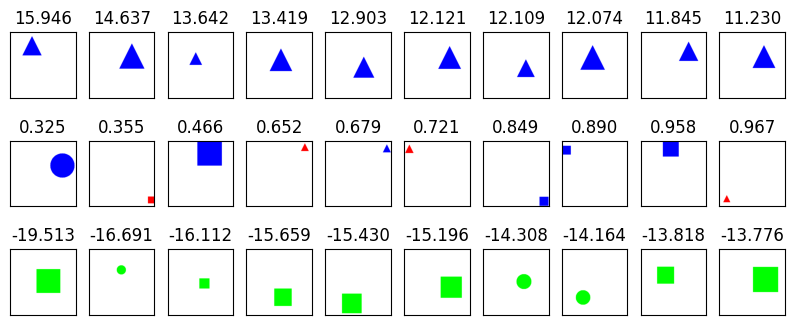

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. shade: 0.1672
	2. photo: 0.1608
	3. background: 0.1451
	4. that: 0.1408
	5. solid: 0.1359
	6. transparent: 0.1253
	7. canvas: 0.1226
	8. the: 0.1214
	9. three: 0.1192
	10. unturn: 0.1091
	11. scarlet: 0.1088
	12. this: 0.1050
	13. picture: 0.1036
	14. red: 0.1027
	15. shape: 0.0951
	16. lime: 0.0912
	17. image: 0.0810
	18. static: 0.0805
	19. crimson: 0.0800
	20. left: 0.0772
	21. round: 0.0717
	22. rotate: 0.0647
	23. right: 0.0625
	24. bottom: 0.0603
	25. form: 0.0513
	26. locate: 0.0492
	27. circular: 0.0487
	28. with: 0.0437
	29. in: 0.0432
	30. angle: 0.0415
	31. have: 0.0388
	32. white: 0.0384
	33. green: 0.0377
	34. cyan: 0.0371
	35. azure: 0.0336
	36. corner: 0.0287
	37. outline: 0.0234
	38. turn: 0.0130
	39. quadratic: 0.0100
	40. is: 0.0069
	41. blank: 0.0060
	42. four: 0.0056
	43. unrotate: 0.004

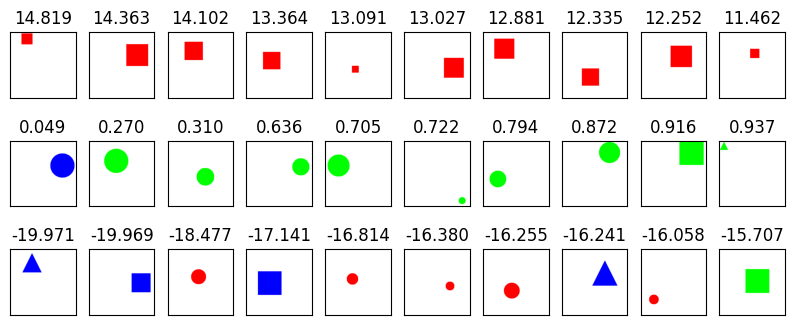

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. blue: 0.3081
	2. azure: 0.1354
	3. cyan: 0.1000
	4. no: 0.0713
	5. outline: 0.0565
	6. green: 0.0306
	7. have: 0.0260
	8. with: 0.0222
	9. four: 0.0002
	10. crimson: 0.0000
	11. red: 0.0000
	12. lime: 0.0000
	13. scarlet: 0.0000
	14. olive: 0.0000
	15. circular: 0.0000
	16. quadratic: 0.0000
	17. is: 0.0000
	18. triangular: 0.0000
	19. unrotate: 0.0000
	20. image: 0.0000
	21. bottom: 0.0000
	22. corner: 0.0000
	23. picture: 0.0000
	24. <pad>: 0.0000
	25. three: 0.0000
	26. color: 0.0000
	27. unturn: 0.0000
	28. turn: 0.0000
	29. background: 0.0000
	30. right: 0.0000
	31. position: 0.0000
	32. this: 0.0000
	33. shape: 0.0000
	34. white: 0.0000
	35. that: 0.0000
	36. form: 0.0000
	37. transparent: 0.0000
	38. fix: 0.0000
	39. blank: 0.0000
	40. locate: 0.0000
	41. in: 0.0000
	42. figure: 0.0000
	43. the: 0.00

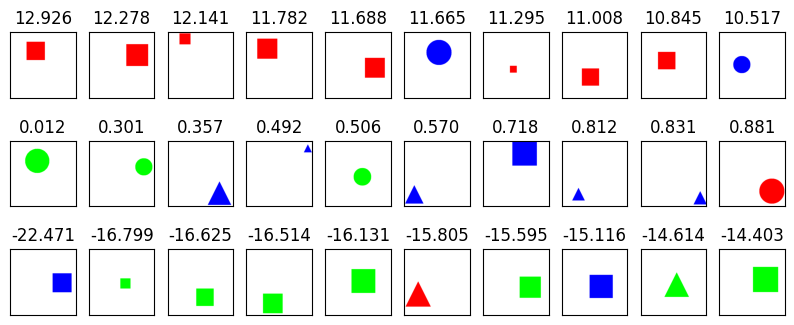

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. quadratic: 0.2005
	2. no: 0.1460
	3. four: 0.1276
	4. with: 0.0654
	5. outline: 0.0420
	6. azure: 0.0376
	7. cyan: 0.0143
	8. have: 0.0124
	9. blue: 0.0082
	10. unrotate: 0.0051
	11. shape: 0.0027
	12. green: 0.0025
	13. triangular: 0.0021
	14. turn: 0.0003
	15. up: 0.0000
	16. static: 0.0000
	17. circular: 0.0000
	18. round: 0.0000
	19. three: 0.0000
	20. red: 0.0000
	21. <pad>: 0.0000
	22. scarlet: 0.0000
	23. crimson: 0.0000
	24. picture: 0.0000
	25. solid: 0.0000
	26. shade: 0.0000
	27. figure: 0.0000
	28. the: 0.0000
	29. is: 0.0000
	30. white: 0.0000
	31. olive: 0.0000
	32. unturn: 0.0000
	33. right: 0.0000
	34. bottom: 0.0000
	35. background: 0.0000
	36. lime: 0.0000
	37. rotate: 0.0000
	38. locate: 0.0000
	39. in: 0.0000
	40. that: 0.0000
	41. form: 0.0000
	42. position: 0.0000
	43. blank: 0.0000
	4

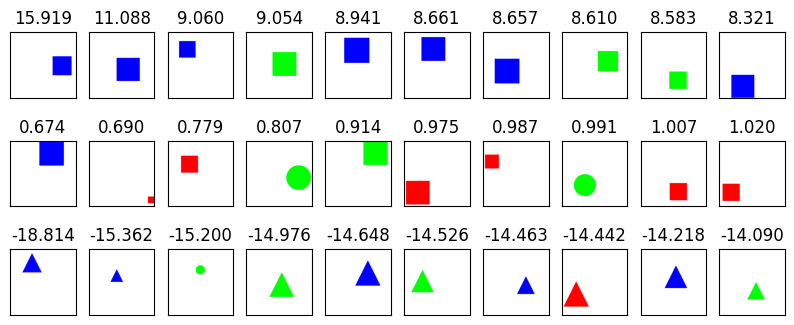

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. have: 0.2898
	2. green: 0.2562
	3. olive: 0.2392
	4. lime: 0.2283
	5. rotate: 0.2252
	6. three: 0.1978
	7. turn: 0.1757
	8. azure: 0.1597
	9. quadratic: 0.1293
	10. in: 0.1151
	11. cyan: 0.1041
	12. the: 0.0954
	13. with: 0.0934
	14. outline: 0.0717
	15. blue: 0.0696
	16. scarlet: 0.0465
	17. unrotate: 0.0274
	18. canvas: 0.0251
	19. crimson: 0.0244
	20. picture: 0.0202
	21. photo: 0.0177
	22. four: 0.0113
	23. shade: 0.0059
	24. static: 0.0046
	25. no: 0.0034
	26. right: 0.0029
	27. this: 0.0008
	28. image: 0.0001
	29. locate: 0.0001
	30. angle: 0.0000
	31. corner: 0.0000
	32. transparent: 0.0000
	33. circular: 0.0000
	34. triangular: 0.0000
	35. red: 0.0000
	36. is: 0.0000
	37. position: 0.0000
	38. unturn: 0.0000
	39. <pad>: 0.0000
	40. fix: 0.0000
	41. form: 0.0000
	42. that: 0.0000
	43. shape: 0.0000
	

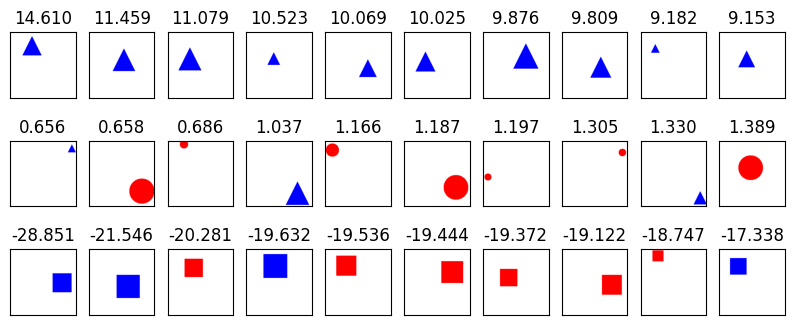

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. white: 0.2419
	2. this: 0.2320
	3. unturn: 0.1882
	4. that: 0.1664
	5. canvas: 0.1664
	6. static: 0.1648
	7. background: 0.1517
	8. right: 0.1046
	9. locate: 0.0930
	10. solid: 0.0714
	11. left: 0.0669
	12. outline: 0.0611
	13. picture: 0.0589
	14. with: 0.0465
	15. image: 0.0433
	16. bottom: 0.0417
	17. three: 0.0392
	18. the: 0.0351
	19. lime: 0.0304
	20. rotate: 0.0263
	21. round: 0.0217
	22. photo: 0.0189
	23. corner: 0.0177
	24. green: 0.0146
	25. shade: 0.0128
	26. in: 0.0095
	27. angle: 0.0091
	28. circular: 0.0082
	29. azure: 0.0071
	30. red: 0.0060
	31. shape: 0.0051
	32. transparent: 0.0023
	33. scarlet: 0.0001
	34. figure: 0.0000
	35. blank: 0.0000
	36. turn: 0.0000
	37. fix: 0.0000
	38. unrotate: 0.0000
	39. position: 0.0000
	40. quadratic: 0.0000
	41. cyan: 0.0000
	42. triangular: 0.0000
	43. u

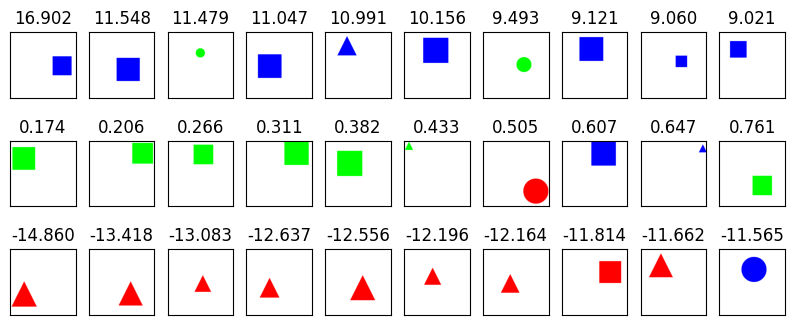

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. triangular: 0.2659
	2. quadratic: 0.2611
	3. corner: 0.1633
	4. unrotate: 0.1582
	5. no: 0.1568
	6. angle: 0.1558
	7. four: 0.1465
	8. up: 0.1158
	9. shape: 0.1138
	10. turn: 0.1013
	11. figure: 0.0989
	12. outline: 0.0930
	13. blank: 0.0918
	14. circular: 0.0897
	15. is: 0.0745
	16. color: 0.0717
	17. with: 0.0623
	18. right: 0.0601
	19. bottom: 0.0549
	20. in: 0.0548
	21. static: 0.0496
	22. position: 0.0473
	23. locate: 0.0357
	24. rotate: 0.0305
	25. fix: 0.0304
	26. picture: 0.0300
	27. form: 0.0293
	28. blue: 0.0279
	29. cyan: 0.0152
	30. azure: 0.0149
	31. white: 0.0123
	32. unturn: 0.0104
	33. transparent: 0.0092
	34. crimson: 0.0092
	35. have: 0.0091
	36. left: 0.0082
	37. the: 0.0081
	38. round: 0.0076
	39. scarlet: 0.0072
	40. solid: 0.0021
	41. olive: 0.0017
	42. canvas: 0.0002
	43. green: 0.000

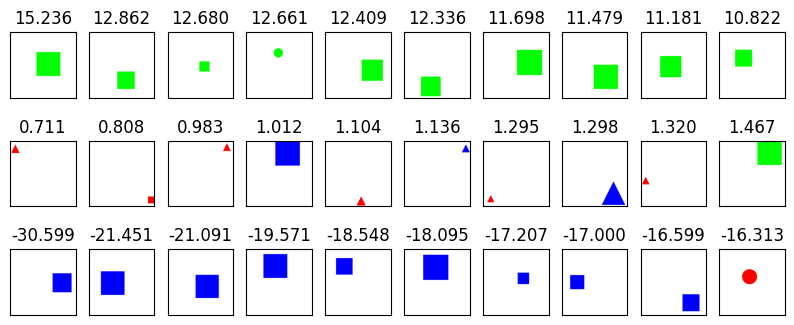

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. azure: 0.2023
	2. cyan: 0.1810
	3. no: 0.1500
	4. blue: 0.1416
	5. have: 0.1390
	6. outline: 0.1053
	7. with: 0.0798
	8. green: 0.0319
	9. turn: 0.0094
	10. quadratic: 0.0047
	11. four: 0.0029
	12. rotate: 0.0006
	13. lime: 0.0002
	14. circular: 0.0000
	15. triangular: 0.0000
	16. crimson: 0.0000
	17. is: 0.0000
	18. red: 0.0000
	19. scarlet: 0.0000
	20. olive: 0.0000
	21. corner: 0.0000
	22. <pad>: 0.0000
	23. image: 0.0000
	24. unrotate: 0.0000
	25. picture: 0.0000
	26. white: 0.0000
	27. background: 0.0000
	28. unturn: 0.0000
	29. right: 0.0000
	30. bottom: 0.0000
	31. position: 0.0000
	32. transparent: 0.0000
	33. color: 0.0000
	34. the: 0.0000
	35. figure: 0.0000
	36. that: 0.0000
	37. form: 0.0000
	38. fix: 0.0000
	39. this: 0.0000
	40. shape: 0.0000
	41. static: 0.0000
	42. photo: 0.0000
	43. locate:

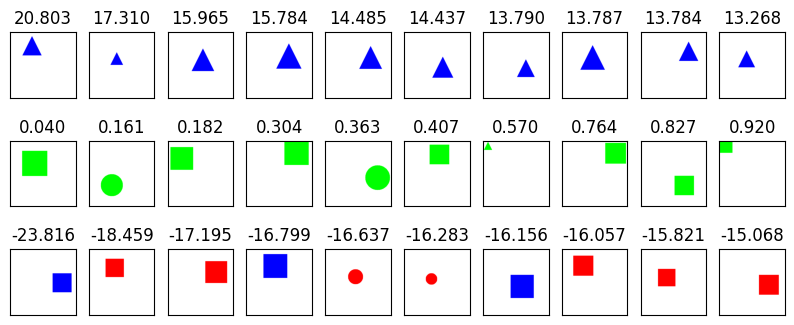

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. position: 0.1662
	2. fix: 0.1651
	3. is: 0.1541
	4. color: 0.1485
	5. olive: 0.1171
	6. round: 0.1160
	7. crimson: 0.1045
	8. image: 0.1024
	9. in: 0.0995
	10. turn: 0.0963
	11. circular: 0.0952
	12. angle: 0.0921
	13. unrotate: 0.0895
	14. red: 0.0892
	15. left: 0.0850
	16. bottom: 0.0817
	17. triangular: 0.0779
	18. form: 0.0778
	19. scarlet: 0.0746
	20. blank: 0.0731
	21. right: 0.0695
	22. locate: 0.0674
	23. transparent: 0.0666
	24. no: 0.0639
	25. corner: 0.0631
	26. picture: 0.0628
	27. figure: 0.0626
	28. four: 0.0568
	29. blue: 0.0539
	30. rotate: 0.0534
	31. outline: 0.0510
	32. up: 0.0473
	33. solid: 0.0425
	34. white: 0.0419
	35. with: 0.0360
	36. static: 0.0339
	37. shape: 0.0323
	38. photo: 0.0321
	39. quadratic: 0.0298
	40. the: 0.0260
	41. have: 0.0231
	42. shade: 0.0190
	43. canvas: 0.0162


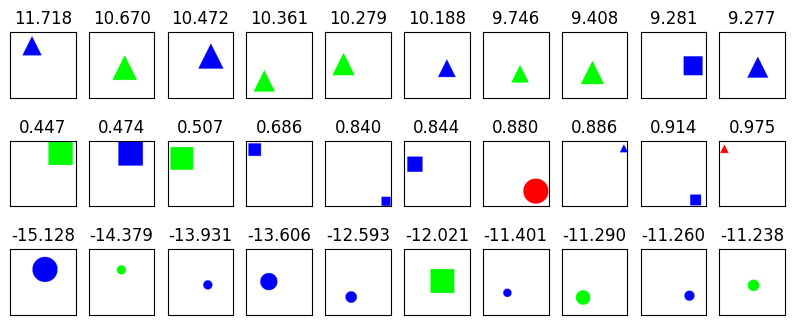

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. green: 0.2880
	2. blue: 0.2478
	3. azure: 0.2351
	4. cyan: 0.2123
	5. have: 0.1305
	6. lime: 0.1172
	7. outline: 0.0451
	8. with: 0.0214
	9. quadratic: 0.0208
	10. turn: 0.0018
	11. no: 0.0012
	12. unrotate: 0.0000
	13. crimson: 0.0000
	14. red: 0.0000
	15. scarlet: 0.0000
	16. olive: 0.0000
	17. circular: 0.0000
	18. triangular: 0.0000
	19. is: 0.0000
	20. corner: 0.0000
	21. <pad>: 0.0000
	22. image: 0.0000
	23. picture: 0.0000
	24. rotate: 0.0000
	25. position: 0.0000
	26. white: 0.0000
	27. bottom: 0.0000
	28. background: 0.0000
	29. right: 0.0000
	30. transparent: 0.0000
	31. static: 0.0000
	32. form: 0.0000
	33. that: 0.0000
	34. color: 0.0000
	35. the: 0.0000
	36. figure: 0.0000
	37. unturn: 0.0000
	38. shape: 0.0000
	39. this: 0.0000
	40. shade: 0.0000
	41. left: 0.0000
	42. fix: 0.0000
	43. photo:

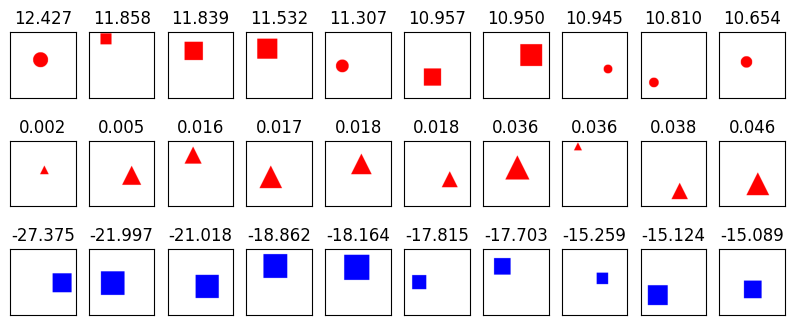

------------------------------------------------------------------------------------------------------------------------
Concept #11

Top-k tokens w.r.t. average attention score:
	1. up: 0.2763
	2. figure: 0.2535
	3. blank: 0.2121
	4. form: 0.1843
	5. four: 0.1394
	6. shape: 0.1040
	7. locate: 0.0871
	8. unrotate: 0.0854
	9. cyan: 0.0737
	10. circular: 0.0731
	11. bottom: 0.0698
	12. the: 0.0663
	13. corner: 0.0649
	14. no: 0.0481
	15. triangular: 0.0408
	16. left: 0.0389
	17. with: 0.0386
	18. angle: 0.0367
	19. position: 0.0362
	20. right: 0.0166
	21. white: 0.0156
	22. azure: 0.0122
	23. color: 0.0103
	24. fix: 0.0083
	25. outline: 0.0052
	26. transparent: 0.0047
	27. picture: 0.0044
	28. lime: 0.0039
	29. green: 0.0038
	30. static: 0.0022
	31. shade: 0.0009
	32. scarlet: 0.0009
	33. unturn: 0.0001
	34. in: 0.0001
	35. solid: 0.0000
	36. this: 0.0000
	37. quadratic: 0.0000
	38. round: 0.0000
	39. olive: 0.0000
	40. <pad>: 0.0000
	41. that: 0.0000
	42. red: 0.0000
	43. crimson: 0.000

IndexError: list index out of range

In [6]:
for i in range(51):
    visualize_concept(i)